In [8]:
%%capture [--no-stdout]
import numpy as np
import pandas as pd
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)
init_notebook_mode(connected=True)
import itables.options as opt

opt.classes="display nowrap compact"
opt.buttons=["copyHtml5", "csvHtml5", "excelHtml5"]
opt.maxBytes=0
%env FHIR_BASE= https://google-fhir.fhir-aggregator.org

# Accessing the FHIR Aggregator Vocabulary

## The Vocabulary DataFrame: A Researcher's Guide to Data Elements
Imagine you have a vast collection of FHIR data, containing medical records, research studies, and various observations. Within this data, there are numerous CodeableConcepts and Extensions that provide structure and meaning to the information. However, as a researcher, it's crucial to have a clear overview of these key data elements and how they're used.

**This is where the Vocabulary DataFrame comes in.**

The Vocabulary DataFrame is essentially a summary table that catalogs the important CodeableConcepts and Extensions found within the FHIR dataset. It acts as a central inventory, providing researchers with valuable insights into the structure and content of the data.

**Here's how it helps:**

**Identifying Key Data Elements**: The DataFrame lists all the significant CodeableConcepts and Extensions used within the data, giving researchers a comprehensive view of the elements present.

**Understanding Code Systems and Terminology**: It provides information about the code systems and terminologies associated with each CodeableConcept (e.g., SNOMED CT, LOINC), helping researchers interpret the coded data.

**Exploring Data Structure and Usage**: The DataFrame reveals where these CodeableConcepts and Extensions are used within different FHIR resources and elements (e.g., Condition.code, Observation.valueCodeableConcept). This helps researchers understand how the data is structured and how these elements relate to each other.

**Navigating to Specific Data**: It often includes FHIR queries that can be used to directly access the data associated with each CodeableConcept or Extension, making it easier to locate specific information.

**Facilitating Data Analysis**: By providing a structured inventory of key data elements, the Vocabulary DataFrame simplifies data exploration, analysis, and the formulation of research questions.

**Analogy**:

Think of the Vocabulary DataFrame as a library catalog. Just as a catalog helps you find books based on author, title, or subject, the DataFrame helps you find specific data elements within the FHIR dataset based on their code system, display, or where they are used.

**Example**:

The Vocabulary DataFrame contains columns like:

`research_study_identifiers`: Linking the CodeableConcept/extension to the study.
`path`: Showing the FHIR element where the code is used (e.g., Condition.code).
`system`: Indicating the code system (e.g., http://snomed.info/sct).
`display`: Providing a human-readable label for the code (e.g., Diabetes mellitus).
`url`: Linking to a FHIR query to retrieve more information.

This structure empowers researchers to:

* Quickly identify all the conditions documented in studies using SNOMED CT codes.
* Explore the range of medications recorded in the dataset.
* Locate specific observations related to tumor grades.

**In essence, the Vocabulary DataFrame serves as a valuable tool for researchers, providing a structured overview of the key data elements within the FHIR dataset, enabling them to effectively explore, analyze, and understand the available information. **

## Retrieve vocabularies used on commonly used resources

When a study is submitted to the site, we survey the data and create an [Observation](https://hl7.org/fhir/R4B/observation.html) of the data in the Study. These summary Observations are published on the server.

These summaries can inform researchers who need to formulate queries. e.g. for all studies:
* what are the conditions?
* what condition stages?
* what are the tumor grades ?
* what are the medications?
* what are the document types?

We can query the data using a FHIR query. These queries leverage the fq and jq tools, so be sure to install both.

In [9]:
!pip install fhir-aggregator-client --no-cache-dir --quiet
!fq

Usage: fq [OPTIONS] COMMAND [ARGS]...

  Run FHIR GraphDefinition traversal.

Options:
  --help  Show this message and exit.

Commands:
  main*       Run FHIR GraphDefinition traversal.
  dataframe   Create dataframes from the local db.
  summarize   Summarize the aggregation results.
  visualize   Visualize the aggregation results.
  vocabulary  Retrieve Vocabulary Observation and ResearchStudy resources...


In [12]:
# Install the jq json formatter tool
!sudo -s apt-get install -yq jq > /dev/null
!jq --version

The system cannot find the path specified.
'jq' is not recognized as an internal or external command,
operable program or batch file.


In [13]:
# get the native FHIR vocabulary Observation
! curl -s $FHIR_BASE'/Observation?code=vocabulary' | jq . | head -50

'jq' is not recognized as an internal or external command,
operable program or batch file.


## Vocabulary Dataframe

As a convenience, the fhir-aggregator-client's vocabulary command will query this data and save it in a local dataframe.

This generates a tab-separated file named vocabulary.tsv, which serves as an inventory of the server's data elements and their usage, including example FHIR queries to retrieve those values.

In [15]:
%%capture [--no-stdout]
!fq vocabulary vocabulary.tsv --fhir-base-url $FHIR_BASE

This dataframe provides a catalog of the data elements present in the FHIR server, along with other useful information.

Create a dataframe from the vocabulary tsv.  Note that the `url` field is a FHIR query that will return the resources that match that vocabulary.  The `documentation` column links to the data dictionary documentation for that field.

| Column                     | Description                                                                                                                                                                                                   |
|----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| research_study_identifiers | A comma-separated list of identifiers that uniquely identify the research studies where this data element is found. This helps to link the data element back to specific studies.                             |
| path                       | The FHIR resource and element where the code is used (e.g., Condition.code, Observation.valueCodeableConcept). This shows the structural context of the data element within FHIR resources.                   |
| documentation              | A URL linking to the official FHIR data dictionary documentation for the specific data element. This provides detailed information about the meaning and usage of the element according to the FHIR standard. |
| code                       | The actual code value within a CodeableConcept. This is the coded representation of the data element (e.g., a SNOMED CT code for a specific disease).                                                         |
| display                    | A human-readable label or description associated with the code. This makes it easier to understand the meaning of the code without needing to look up code system definitions.                                |
| system                     | The code system or terminology from which the code originates (e.g., http://snomed.info/sct, http://loinc.org). This helps to identify the source and context of the code.                                    |
| extension_url              | If the data element is an Extension, this column contains the URL that defines the Extension. Extensions provide a way to add custom data elements to FHIR resources.                                         |
| count                      | The number of times this specific code value was found within the FHIR data. This gives an indication of the prevalence or frequency of the data element.                                                     |
| low                        | If the data element is numeric and has a defined range, this column represents the lower bound of the range. This is helpful for understanding the possible values for numeric data elements.                 |
| high                       | If the data element is numeric and has a defined range, this column represents the upper bound of the range. Similar to low, this helps to understand the potential values.                                   |
| research_study_title       | The title of the research study associated with this data element. This provides a more descriptive context for understanding where the data element is used.                                                 |
| research_study_description | A brief description of the research study associated with the data element. This offers additional context for the data element's usage.                                                                      |
| observation                | The ID of the Observation resource which is used to store the vocabulary. This provides a way to see where this data element was extracted from in the FHIR server.                                           |
| research_study             | The ID of the research study where the vocabulary is used. This allows you to retrieve the specific study that contains the vocabulary                                                                        |
| url                        | A readily available FHIR query that can be used to retrieve the resources that contain the itemized data for this code. This makes it easy to access the data for analysis.                                   |

In [16]:
import pandas as pd
df = pd.read_csv('vocabulary.tsv', sep='\t').fillna('')
df.loc[df['research_study_identifiers'] == 'GTEX_V10']

,research_study_identifiers,path,documentation,code,display,system,extension_url,count,low,high,url,research_study_title,research_study_description,observation,research_study
15,GTEX_V10,ServiceRequest.category,https://hl7.org/fhir/R4B/servicerequest-defini...,108252007,Laboratory procedure,http://snomed.info/sct,,1.0,,,https://google-fhir.fhir-aggregator.org/Servic...,GTEX Analysis v10 Adult Sample and Subject Met...,,Observation/a0b18b67-8324-5326-b57f-7e5aa71a1f12,ResearchStudy/262baf63-be05-5a41-8a2d-6c733460...
16,GTEX_V10,ServiceRequest.code,https://hl7.org/fhir/R4B/servicerequest-defini...,15220000,Laboratory test,http://snomed.info/sct,,1.0,,,https://google-fhir.fhir-aggregator.org/Servic...,GTEX Analysis v10 Adult Sample and Subject Met...,,Observation/a0b18b67-8324-5326-b57f-7e5aa71a1f12,ResearchStudy/262baf63-be05-5a41-8a2d-6c733460...
17,GTEX_V10,DocumentReference.type,https://hl7.org/fhir/R4B/documentreference-def...,file,file,https://gtexportal.org/api/v2/dataset/fileList,,49.0,,,https://google-fhir.fhir-aggregator.org/Docume...,GTEX Analysis v10 Adult Sample and Subject Met...,,Observation/a0b18b67-8324-5326-b57f-7e5aa71a1f12,ResearchStudy/262baf63-be05-5a41-8a2d-6c733460...
18,GTEX_V10,Specimen.type,https://hl7.org/fhir/R4B/specimen-definitions....,WES,WES,https://terminology.hl7.org/CodeSystem-v3-Spec...,,979.0,,,https://google-fhir.fhir-aggregator.org/Specim...,GTEX Analysis v10 Adult Sample and Subject Met...,,Observation/a0b18b67-8324-5326-b57f-7e5aa71a1f12,ResearchStudy/262baf63-be05-5a41-8a2d-6c733460...
19,GTEX_V10,Specimen.type,https://hl7.org/fhir/R4B/specimen-definitions....,OMNI,OMNI,https://terminology.hl7.org/CodeSystem-v3-Spec...,,450.0,,,https://google-fhir.fhir-aggregator.org/Specim...,GTEX Analysis v10 Adult Sample and Subject Met...,,Observation/a0b18b67-8324-5326-b57f-7e5aa71a1f12,ResearchStudy/262baf63-be05-5a41-8a2d-6c733460...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,GTEX_V10,Patient.extension,https://hl7.org/fhir/R4B/patient-definitions.h...,1956 - 1965,1956 - 1965,,https://hl7.org/fhir/extensions/SearchParamete...,5.0,,,https://google-fhir.fhir-aggregator.org/Patien...,GTEX Analysis v10 Adult Sample and Subject Met...,,Observation/a0b18b67-8324-5326-b57f-7e5aa71a1f12,ResearchStudy/262baf63-be05-5a41-8a2d-6c733460...
97,GTEX_V10,Patient.extension,https://hl7.org/fhir/R4B/patient-definitions.h...,1976 - 1985,1976 - 1985,,https://hl7.org/fhir/extensions/SearchParamete...,2.0,,,https://google-fhir.fhir-aggregator.org/Patien...,GTEX Analysis v10 Adult Sample and Subject Met...,,Observation/a0b18b67-8324-5326-b57f-7e5aa71a1f12,ResearchStudy/262baf63-be05-5a41-8a2d-6c733460...
98,GTEX_V10,Patient.extension,https://hl7.org/fhir/R4B/patient-definitions.h...,1966 - 1975,1966 - 1975,,https://hl7.org/fhir/extensions/SearchParamete...,7.0,,,https://google-fhir.fhir-aggregator.org/Patien...,GTEX Analysis v10 Adult Sample and Subject Met...,,Observation/a0b18b67-8324-5326-b57f-7e5aa71a1f12,ResearchStudy/262baf63-be05-5a41-8a2d-6c733460...
99,GTEX_V10,Patient.extension,https://hl7.org/fhir/R4B/patient-definitions.h...,1986 - 1995,1986 - 1995,,https://hl7.org/fhir/extensions/SearchParamete...,2.0,,,https://google-fhir.fhir-aggregator.org/Patien...,GTEX Analysis v10 Adult Sample and Subject Met...,,Observation/a0b18b67-8324-5326-b57f-7e5aa71a1f12,ResearchStudy/262baf63-be05-5a41-8a2d-6c733460...


## Accessing Native FHIR Data with Pre-formatted URLs
The vocabulary dataframe generated by the fq vocabulary command provides a convenient way to access the native FHIR data associated with each data element. This is achieved through the pre-formatted URLs present in the url column of the dataframe.

Here's how researchers can use these URLs:

1. **Identify the Data Element of Interest**

Researchers should first identify the specific data element they want to explore further. This can be done by examining the rows in the vocabulary dataframe and focusing on the columns like path, display, and system to locate the desired element.

2. **Retrieve the Pre-formatted URL**

Once the data element is identified, researchers should locate the corresponding pre-formatted URL in the url column of the same row. This URL is specifically crafted to retrieve FHIR resources containing the itemized data for that code.

3. **Execute the URL as a FHIR Query**

Researchers can execute this pre-formatted URL using tools like curl within a terminal or a Jupyter Notebook cell. The curl command will send a request to the FHIR server and retrieve the relevant FHIR resources. Here's how to execute the pre-formatted url with curl:

```!curl -s $FHIR_BASE/$URL | jq .```

Replace the following:

* `$FHIR_BASE` - FHIR server's base URL.
* `$URL` - The url obtained from the url field.

**Example**

Assume a researcher has found a pre-formatted url of DocumentReference/?category=H%26E&part-of-study=ResearchStudy/b7015858-983c-5e51-bcd6-af788edd5056 in the url column for H&E data:

`Note` Use the [documentation](https://hl7.org/fhir/R4B/documentreference-definitions.html#DocumentReference.category) field to see the FHIR data dictionary for the field


In [18]:
!curl -s $FHIR_BASE'/DocumentReference/?category=H%26E&part-of-study=ResearchStudy/b7015858-983c-5e51-bcd6-af788edd5056&_count=0' | echo There are `jq .total` DocumentReferences of that category in this study.

'part-of-study' is not recognized as an internal or external command,
operable program or batch file.
'_count' is not recognized as an internal or external command,
operable program or batch file.


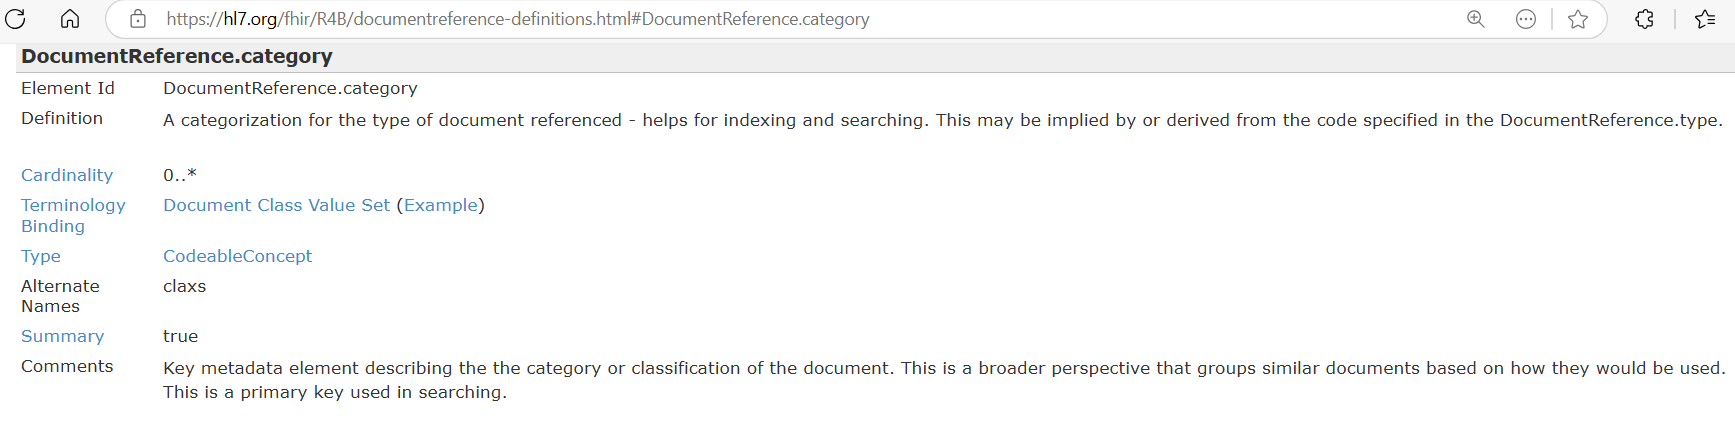